In [10]:
import requests
from bs4 import BeautifulSoup

In [20]:
def article_crawler(url):
    """
    Input:
           url -> https://www.ptt.cc/bbs/NBA/M.1493020274.A.8BA.html
    
    Output:
           article_dict -> {'url': "https://www.ptt.cc/bbs/NBA/M.1493020274.A.8BA.html",
                            'title': "Re: [討論] 看完雷霆火箭G4，鬍龜隊友真的差不多嗎?",
                            'author': "griefman (小蟻天)",
                            'tm': "Mon Apr 24 15:51:07 2017"
                            'board': "NBA",
                            'ip': '127.0.0.1,
                            'content': "※ 引述《adonistao (三部五十)》之銘言：
                                        : ※ 引述《Turtle100 (龜龜100)》之銘言：
                                        : : 差很多
                                        : : 先說結論
                                        : : 跟鬍子打球:
                                        : : 你覺得火箭每個人都是巨頭 。
                                        : : 跟西河打球:.............................",
                            'push': [
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                            ]}
                            
    Note:
            文章內容，與其用精準的selector，不如把不相干的（或是已經爬下來的）Tag給刪掉。
            https://www.crummy.com/software/BeautifulSoup/bs4/doc/#decompose
    
    """
    article_dict = {}
    
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    meta_lines = soup.select('div.article-metaline > span')
    article_dict['author'] = meta_lines[1].text
    article_dict['title']  = meta_lines[3].text
    article_dict['tm']     = meta_lines[5].text
    article_dict['board']  = soup.select('div.article-metaline-right > span')[1].text
    
    pushs = []
    for push in soup.select('div.push'):
        push_dict = {}
        push_dict['push_type']    = push.select_one('.push-tag').text.strip()
        push_dict['push_author']  = push.select_one('.push-userid').text.strip()
        push_dict['push_content'] = push.select_one('.push-content').text.replace(': ', '')
        push_dict['push_tm']      = push.select_one('.push-ipdatetime').text.strip()
        pushs.append(push_dict)
    
    article_dict['pushs'] = pushs
    
    for trash in soup.select('div.article-metaline > span') + soup.select('div.article-metaline-right > span') + soup.select('div.push'):
        trash.decompose()
        
    content_raw = soup.select_one('#main-content').text.strip()
    article_dict['ip']      = content_raw.split(', 來自: ')[1].split('\n※ 文章網址:')[0]
    article_dict['content'] = content_raw.split('\n※ 發信站')[0]
    
    return article_dict

In [19]:
content_raw = soup.select_one('#main-content').text.strip()
content_raw

'作者griefman (小蟻天)看板NBA標題Re: [討論] 看完雷霆火箭G4，鬍龜隊友真的差不多嗎?時間Mon Apr 24 15:51:07 2017\n※ 引述《adonistao (三部五十)》之銘言：\n: ※ 引述《Turtle100 (龜龜100)》之銘言：\n: : 差很多\n: : 先說結論\n: : 跟鬍子打球:\n: : 你覺得火箭每個人都是巨頭 。\n: : 跟西河打球:\n: : 你覺得隊友怎麼都跟雜魚一樣。\n: 完全不懂為何這件事可以吵這們久\n: 我們來比一下雙方隊友在遇到鬍跟龜之前的生涯數據\n: 鬍鬍 Carry 的巨頭隊友\n:              Pts     FG%     Reb    Ast\n: T. Ariza     10.0    0.43    4.7    2.0\n: Anderson     13.3    0.42    5.5    0.9\n: E. Gordon    16.7    0.44    2.5    3.3\n: Nene         12.2    0.54    6.4    2.0\n: L. Williams  12.8    0.42    2.7    2.9\n: * C. Capela 、Beverley 生涯都跟鬍同隊因此不列入考慮\n: 龜龜弱化的雜魚隊友\n:              Pts     FG%     Reb    Ast\n: T. Gibson    09.4    0.49    6.4    1.0\n: V.Oladipo    15.9    0.43    4.4    4.1\n: E. Kanter    09.3    0.50    5.9    0.5\n: D.McDermott  08.2    0.44    2.3    0.7\n: J. Grant     08.7    0.39    3.9    1.5\n: * Roberson 、S. Adams 生涯都跟龜同隊因此不列入考慮\n: 誰的隊友比較強，就讓大家自己看吧\n\n\n先排除上場時間的問題，以下一律以Per 36min為主\n另外也扣除掉生涯初期，以前三年為主\n讓我們來看看你所謂的OKC雜魚們的成績\n\n          

In [22]:
#同標籤用索引   大標籤不同子標籤用for + select_one取值

In [11]:
url ='https://www.ptt.cc/bbs/NBA/M.1493020274.A.8BA.html'
article_dict = {}
res = requests.get(url)
soup = BeautifulSoup(res.text, 'lxml')
meta_lines = soup.select('div.article-metaline > span')
article_dict['author'] = meta_lines[1].text
article_dict['title']  = meta_lines[3].text
article_dict['tm']     = meta_lines[5].text
article_dict['board']  = soup.select('div.article-metaline-right > span')[1].text
meta_lines

[<span class="article-meta-tag">作者</span>,
 <span class="article-meta-value">griefman (小蟻天)</span>,
 <span class="article-meta-tag">標題</span>,
 <span class="article-meta-value">Re: [討論] 看完雷霆火箭G4，鬍龜隊友真的差不多嗎?</span>,
 <span class="article-meta-tag">時間</span>,
 <span class="article-meta-value">Mon Apr 24 15:51:07 2017</span>]

In [24]:
soup.select('div.push')

[<div class="push"><span class="f1 hl push-tag">→ </span><span class="f3 hl push-userid">allenblack  </span><span class="f3 push-content">: 為啥雷霆隊友全面雜魚化?</span><span class="push-ipdatetime"> 04/24 15:54
 </span></div>,
 <div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">Skabo       </span><span class="f3 push-content">: 去MDA手下打球數據生涯年換大約 跟著龜龜打好慘</span><span class="push-ipdatetime"> 04/24 15:54
 </span></div>,
 <div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">tofly       </span><span class="f3 push-content">: 證實神龜真的有雜魚靈氣??</span><span class="push-ipdatetime"> 04/24 15:55
 </span></div>,
 <div class="push"><span class="f1 hl push-tag">→ </span><span class="f3 hl push-userid">sttarmbcb390</span><span class="f3 push-content">: PER36......</span><span class="push-ipdatetime"> 04/24 15:59
 </span></div>,
 <div class="push"><span class="hl push-tag">推 </span><span class="f3 hl push-userid">faintbreeze </span><span class="f3 p

In [25]:
 pushs = []
for push in soup.select('div.push'):
    push_dict = {}
    push_dict['push_type']    = push.select_one('.push-tag').text.strip()
    push_dict['push_author']  = push.select_one('.push-userid').text.strip()
    push_dict['push_content'] = push.select_one('.push-content').text.replace(': ', '')
    push_dict['push_tm']      = push.select_one('.push-ipdatetime').text.strip()
    pushs.append(push_dict)
pushs

[{'push_author': 'allenblack',
  'push_content': '為啥雷霆隊友全面雜魚化?',
  'push_tm': '04/24 15:54',
  'push_type': '→'},
 {'push_author': 'Skabo',
  'push_content': '去MDA手下打球數據生涯年換大約 跟著龜龜打好慘',
  'push_tm': '04/24 15:54',
  'push_type': '推'},
 {'push_author': 'tofly',
  'push_content': '證實神龜真的有雜魚靈氣??',
  'push_tm': '04/24 15:55',
  'push_type': '推'},
 {'push_author': 'sttarmbcb390',
  'push_content': 'PER36......',
  'push_tm': '04/24 15:59',
  'push_type': '→'},
 {'push_author': 'faintbreeze',
  'push_content': '你很多行:沒去掉.......',
  'push_tm': '04/24 16:17',
  'push_type': '推'},
 {'push_author': 'sttarmbcb390',
  'push_content': 'PER36 RA20.2-16.7 LOU27.7-20.9 ARIZA14.6-12.9',
  'push_tm': '04/24 16:21',
  'push_type': '→'},
 {'push_author': 'sttarmbcb390',
  'push_content': 'EG16.7-18.9 NENE17.3-18.3',
  'push_tm': '04/24 16:22',
  'push_type': '→'},
 {'push_author': 'aegis43210',
  'push_content': '看出雷霆的單核體系磨合了一年但還是差強人意',
  'push_tm': '04/24 18:18',
  'push_type': '推'},
 {'push_author': 'ISu

In [21]:
nba_data = article_crawler("https://www.ptt.cc/bbs/NBA/M.1493231113.A.172.html")
nba_data

{'author': 'yiyi7443 (不捨)',
 'board': 'NBA',
 'content': "The NBA Is Lucky I’m Home Doing Damn Articles\n\n日\u3000\u3000期：APR 25 2017\n作\u3000\u3000者：Dion Waiters(現役邁阿密熱火隊後衛)\n原文連結：\nhttps://www.theplayerstribune.com/dion-waiters-miami-heat-nba-is-lucky/\nhttp://i.imgur.com/kMFQmKm.jpg\n\nY'all seen Casino, right?\n\n你們都看過《賭國風雲》這部電影吧？\n\nYou know, the one with Robert De Niro and Joe Pesci in Vegas? Anyway — that\none.\n\n勞勃狄尼洛和喬派西在拉斯維加斯的那部就是了。\n\nIf you want to know what it’s like to meet Pat Riley, you need to watch that\nmovie.\n\n如果你想知道和帕特萊利會面的感覺，一定要看這部電影。\n\nWhen I heard that Miami was interested in me this summer, I wasn’t really\nseeing it at first. Nothing against the Heat, but I didn’t know how I’d fit\nthere.\n\n當我知道邁阿密對我有意思的時候，我一開始沒什麼興趣。\n不是對熱火有意見，只是不曉得自己適不適合那裡。\n\nThen I met Pat Riley.\n\n然後我見到了帕特萊利。\n\nI walked into his office and … damn. The hair was slicked back, and he was\nwearing one of those suits of his, you know, real O.G., looking like a\nmillion bucks. Behind him,

In [27]:
nba_data['tm']

'Thu Apr 27 02:25:07 2017'

In [28]:
nba_data['title']

'[外絮] NBA算你們走運 - Dion Waiters'

In [29]:
nba_data

{'author': 'yiyi7443 (不捨)',
 'board': 'NBA',
 'content': "The NBA Is Lucky I’m Home Doing Damn Articles\n\n日\u3000\u3000期：APR 25 2017\n作\u3000\u3000者：Dion Waiters(現役邁阿密熱火隊後衛)\n原文連結：\nhttps://www.theplayerstribune.com/dion-waiters-miami-heat-nba-is-lucky/\nhttp://i.imgur.com/kMFQmKm.jpg\n\nY'all seen Casino, right?\n\n你們都看過《賭國風雲》這部電影吧？\n\nYou know, the one with Robert De Niro and Joe Pesci in Vegas? Anyway — that\none.\n\n勞勃狄尼洛和喬派西在拉斯維加斯的那部就是了。\n\nIf you want to know what it’s like to meet Pat Riley, you need to watch that\nmovie.\n\n如果你想知道和帕特萊利會面的感覺，一定要看這部電影。\n\nWhen I heard that Miami was interested in me this summer, I wasn’t really\nseeing it at first. Nothing against the Heat, but I didn’t know how I’d fit\nthere.\n\n當我知道邁阿密對我有意思的時候，我一開始沒什麼興趣。\n不是對熱火有意見，只是不曉得自己適不適合那裡。\n\nThen I met Pat Riley.\n\n然後我見到了帕特萊利。\n\nI walked into his office and … damn. The hair was slicked back, and he was\nwearing one of those suits of his, you know, real O.G., looking like a\nmillion bucks. Behind him,

In [30]:
# Javascrpt  rendered呈現  websites....

In [31]:
res = requests.get('https://www.airbnb.com.tw/')
res

<Response [200]>

In [32]:
with open('./airbnb.html', 'w') as f:      #只有html沒有js
    f.write(res.text)

In [33]:
# honestbee   加入js   從XHR去反解析URL對應到連結  再從連結的URL+Request  去做連線
from lib import toolbox
headers = toolbox.gen_header("""Accept:application/vnd.honestbee+json;version=2
Accept-Encoding:gzip, deflate, sdch, br
Accept-Language:en
Cache-Control:no-cache
Connection:keep-alive
Cookie:ajs_group_id=null; ajs_anonymous_id=%226ac7567b-76fd-4050-9aa9-bc9543845fbb%22; ajs_user_id=%226ac7567b-76fd-4050-9aa9-bc9543845fbb%22; ab.storage.sessionId.36d2d68f-6109-4fba-baa2-17f85da40cd5=%7B%22g%22%3A%22abab41b5-ed84-c5db-c152-faf0b087f13c%22%2C%22e%22%3A1493261233665%2C%22c%22%3A1493259433665%2C%22l%22%3A1493259433665%7D; ab.storage.deviceId.36d2d68f-6109-4fba-baa2-17f85da40cd5=%7B%22g%22%3A%2290381acb-7bfa-0249-d8f8-e228102b68a8%22%2C%22c%22%3A1493259433670%2C%22l%22%3A1493259433670%7D; _uetsid=_uetc75a543d; _TUCI_T=sessionNumber+17283&pageView+17283; _TUCS=1; _TUCI=sessionNumber+1000&ECId+727&hostname+honestbee.tw&pageView+1000&Member; _omappvp=true; _omappvs=true; _ga=GA1.2.686160775.1493259433; om-531426=true
Host:honestbee.tw
Pragma:no-cache
Referer:https://honestbee.tw/en/
User-Agent:Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36""")


res = requests.get('https://honestbee.tw/api/api/stores/547?sort=ranking&pageSize=4&page=1',
                  headers=headers)

In [34]:
res

<Response [400]>

In [35]:
res.json()['products']   #JavaScript =>JSON

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
!pip install splinter

<h4>Use ChromeDriver to open Browser  （網路搶票)

In [ ]:
from splinter import Browser

browser = Browser('chrome')

url = "http://www.google.com"
browser.visit(url)

In [ ]:
search = 'facebook\n'
browser.fill('q', search)            #in q search  下面是用tag點選再輸入
if browser.is_text_present('facebook.com'):
    print("Yes, the blog website was found!")  
else:
    print("No, it wasn't found... We need to improve our SEO techniques")

In [ ]:
search_input = browser.find_by_xpath('//*[@id="lst-ib"]')[0]   #點選瀏覽器 搜尋的位置

In [ ]:
type(search_input)    

In [ ]:
search_input.fill('facebook\n')   #在點選瀏覽器 搜尋的位置 輸入資料

In [ ]:
browser.is_text_present('https://facebook.com')

In [ ]:
blog_link = browser.find_by_xpath('//*[@id="rso"]/div[2]/div/div/div/h3/a')[0]
                                           #點選瀏覽器 指定的位置
blog_link.click()  #在點選瀏覽器 指定的位置 click

In [ ]:
type(blog_link)   

In [ ]:
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')  #scrollTo最下面

In [ ]:
browser.execute_script('window.scrollTo(0, 250)')    #scrollTo250的位置

In [ ]:
browser.screenshot('./ianchenhq.png')   #截瀏覽器當下的圖

In [ ]:
browser.html.strip().split()[:10]

In [ ]:
soup = BeautifulSoup(browser.html, 'lxml')

In [ ]:
from splinter import Browser
# with Browser('chrome') as browser:  #auto close
browser = Browser('chrome') 
url = 'https://www.ptt.cc/bbs/car/index.html'      #ptt board-car
browser.visit(url)  

car_link = browser.find_by_xpath('//*[@id="main-container"]/div[2]/div[8]/div[3]/a')
car_link.click()
browser.html.strip().split()[:10]
soup = BeautifulSoup(browser.html,'lxml')
soup
browser.quit()

In [ ]:
for link in soup.select("h3.r > a"):
    print(link['href'])

In [ ]:
browser.quit()

In [ ]:
with Browser('chrome') as browser:     #自動關閉
    browser.visit('https://ianchenhq.com')
    blog = browser.html

In [ ]:
blog

In [ ]:
browser = Browser('chrome')

In [ ]:
browser.visit("https://www.skyscanner.com.tw")

In [ ]:
dest = browser.find_by_xpath('//*[@id="js-destination-input"]')[0]

In [ ]:
dest.fill('Narita')  

In [ ]:
dept_date = browser.find_by_xpath('//*[@id="js-depart-input"]')[0]

In [ ]:
dept_date = browser.find_by_xpath('//*[@id="category-flights"]/div[12]/div/div/div[2]/div/section/div[2]/table/tbody/tr[6]/td[1]/a')[0]

In [ ]:
dept_date.click()  

In [ ]:
browser.find_by_xpath('//*[@id="js-return-input"]')[0]

In [ ]:
browser.find_by_xpath('//*[@id="category-flights"]/div[13]/div/div/div[2]/div/section/div[1]/button[2]')[0].click()

In [ ]:
browser.find_by_xpath('//*[@id="category-flights"]/div[13]/div/div/div[2]/div/section/div[2]/table/tbody/tr[1]/td[3]/a')[0].click()

In [ ]:
browser.find_by_xpath('//*[@id="js-search-controls-container"]/form/section[2]/button/span[1]')[0].click()

In [ ]:
browser.html

In [ ]:
soup = BeautifulSoup(browser.html, 'lxml')

In [ ]:
soup.select('div.card-body')

In [ ]:
browser.find_by_xpath('//*[@id="day-section"]/div/div[3]/div[9]/div[2]/ul/li[6]/button')[0].click()

In [ ]:
browser = Browser('chrome')

In [ ]:
browser.visit('https://www.indiegogo.com')

In [ ]:
browser.find_by_xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[1]/nav/a[1]')[0].click()

In [ ]:
browser.find_by_xpath('/html/body/div[2]/div/div/div[4]/div/explore-detail/div/div[2]/div[4]/div[1]/div/a[1]/div[2]/div[1]/div[2]')[0].click()

# Python datetime transform

In [ ]:
nba_data = article_crawler("https://www.ptt.cc/bbs/NBA/M.1493231113.A.172.html")

In [ ]:
nba_data['tm']

In [ ]:
from datetime import datetime, timedelta, timezone           #

In [ ]:
datetime.now()                     

In [ ]:
datetime.now().hour

In [ ]:
datetime.now().day

In [ ]:
#用 python datetime 物件產生字串
atetime.now().strftime("%Y-%m-%d %H:%M")        #strftime("%Y-%m-%d %H:%M")  =>  strftime

In [ ]:
#用字串產生 python datetime 物件
nba_tm = datetime.strptime('Thu Apr 27 02:25:07 2017', "%a %b %d %H:%M:%S %Y")
nba_tm                             #datetime.strptime('strftime')  =>  datetime.datetime(datetime)

In [ ]:
nba_tm.day

In [ ]:
nba_tm.isoformat()

In [ ]:
#先轉成datetime.datetime 再使用isoformat() , strftime() , timestamp()

In [ ]:
nba_tm = article_crawler("https://www.ptt.cc/bbs/NBA/M.1491350418.A.B52.html")['tm']
nba_tm

In [ ]:
tm_list = nba_tm.split()
tm_list

In [ ]:
if len(tm_list[2]) == 1:                 #zero-padded不足二位數補足
    tm_list[2] = '0' + tm_list[2]
tm_list

In [ ]:
nba_tm = ' '.join(tm_list)
nba_tm

In [ ]:
# timezone   加入時區的概念
taipei = timezone(+timedelta(hours=8))
taipei

In [ ]:
tz_tm = datetime.now().replace(tzinfo=taipei)
tz_tm                                            # datetime.datetime.replace(tzinfo = 時區)

In [ ]:
type(tz_tm)

In [ ]:
#tz_tm = datetime.datetime(2017, 4, 27, 21, 16, 25, 91794, tzinfo=datetime.timezone(datetime.timedelta(0, 28800)))
tz_tm.isoformat()

In [ ]:
#tz_tm = datetime.datetime(2017, 4, 27, 21, 16, 25, 91794, tzinfo=datetime.timezone(datetime.timedelta(0, 28800)))
tz_tm.timestamp()

In [ ]:
from dateutil import parser
# complete datetime ETL example
gym_data = []
with open('.././datasets/gym.csv') as f:
    for idx, row in enumerate(f): # enumerate -> 得到for loop的index
        if idx == 0:
            header = row.strip().split(",")
        else:
            # zip(['key1', 'key2], [1,2]) -> (key1, 1), (key2, 2)
            # dictionary comprehension..
            row_dict = {k:v for k,v in zip(header, row.strip().split(","))}
            row_dict['timestamp'] = parser.parse(row_dict['timestamp'])                                 #parser.parse
#parser.parse ( val 2017-04-19T16:09:28.036365+08:00) = 
#                         datetime.datetime(2017, 4, 19, 16, 11, 2, 675977, tzinfo=tzoffset(None, 28800))

#parser.parse ( isoformat() ) =  datetime.datetime()          
            gym_data.append(row_dict)
            
        print("NO %s - %s" % (idx, row.strip()))

In [ ]:
gym_data

In [ ]:
[row for row in gym_data if row['timestamp'] > datetime(year=2017, month=4, day=21, tzinfo=taipei)]
                    #row['timestamp'] = datetime.datetime()   >   建構子傳入datetime( , , , )回傳datetime物件                                                                                       #tzinfo

In [ ]:
!pip install arrow

In [ ]:
import arrow

In [ ]:
nba_tm = arrow.Arrow.strptime("Wed Apr 05 08:00:15 2017", "%a %b %d %H:%M:%S %Y", tzinfo='Asia/Taipei')
nba_tm.timestamp

In [ ]:
nba_tm.isoformat()

In [ ]:
arrow.get("Wed Apr 05 08:00:15 2017", 'ddd MMM DD HH:mm:ss YYYY', tzinfo='Asia/Taipei').isoformat()

# Pandas

In [37]:
!pip install pandas

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('.././datasets/gym.csv')
df.head(3)
#isoformat()

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
0,2017-04-19T16:09:28.036365+08:00,45.0,120.0,58.0,300.0,29
1,2017-04-19T16:10:02.452986+08:00,45.0,120.0,57.0,300.0,29
2,2017-04-19T16:11:02.675977+08:00,44.0,120.0,56.0,300.0,29


In [40]:
df = pd.read_csv('.././datasets/gym.csv', parse_dates=['timestamp'])
df.head()                          
#pd.read_csv 裡面的參數 parse_dates 

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
0,2017-04-19 08:09:28.036365,45.0,120.0,58.0,300.0,29
1,2017-04-19 08:10:02.452986,45.0,120.0,57.0,300.0,29
2,2017-04-19 08:11:02.675977,44.0,120.0,56.0,300.0,29
3,2017-04-19 08:12:01.910787,45.0,120.0,56.0,300.0,29
4,2017-04-19 08:13:02.149363,45.0,120.0,54.0,300.0,29


In [41]:
df.head()['timestamp']                                                                                     

0   2017-04-19 08:09:28.036365
1   2017-04-19 08:10:02.452986
2   2017-04-19 08:11:02.675977
3   2017-04-19 08:12:01.910787
4   2017-04-19 08:13:02.149363
Name: timestamp, dtype: datetime64[ns]

In [83]:
# custom datetime parser

# def ________(x):
#     return pd.Timestamp(x)
from dateutil import parser
tz_parser = lambda x: parser.parse(x)                   #parser.parse ( isoformat() ) =  datetime.datetime() 

In [84]:
tz_parser('2017-04-19T16:14:02.360920+08:00')
#parser.parse ( isoformat() ) =  datetime.datetime() 

datetime.datetime(2017, 4, 19, 16, 14, 2, 360920, tzinfo=tzoffset(None, 28800))

In [85]:
df = pd.read_csv('.././datasets/gym.csv', parse_dates=['timestamp'], date_parser=tz_parser)
df.head()
#date_parser=tz_parser 傳入客製方法

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
0,2017-04-19 16:09:28.036365+08:00,45.0,120.0,58.0,300.0,29
1,2017-04-19 16:10:02.452986+08:00,45.0,120.0,57.0,300.0,29
2,2017-04-19 16:11:02.675977+08:00,44.0,120.0,56.0,300.0,29
3,2017-04-19 16:12:01.910787+08:00,45.0,120.0,56.0,300.0,29
4,2017-04-19 16:13:02.149363+08:00,45.0,120.0,54.0,300.0,29


In [86]:
df.head()['timestamp']

0   2017-04-19 16:09:28.036365+08:00
1   2017-04-19 16:10:02.452986+08:00
2   2017-04-19 16:11:02.675977+08:00
3   2017-04-19 16:12:01.910787+08:00
4   2017-04-19 16:13:02.149363+08:00
Name: timestamp, dtype: datetime64[ns, tzoffset(None, 28800)]

In [87]:
df[(df.timestamp > '2017-04-21 00:00+0800') & (df.timestamp < '2017-04-22 00:00+0800')]

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
1910,2017-04-21 00:00:02.230885+08:00,5.0,120.0,0.0,300.0,29
1911,2017-04-21 00:01:02.517614+08:00,0.0,120.0,0.0,300.0,29
1912,2017-04-21 00:02:02.155171+08:00,0.0,120.0,0.0,300.0,29
1913,2017-04-21 00:03:02.423096+08:00,0.0,120.0,0.0,300.0,29
1914,2017-04-21 00:04:02.808699+08:00,0.0,120.0,0.0,300.0,29
1915,2017-04-21 00:05:02.219316+08:00,0.0,120.0,0.0,300.0,29
1916,2017-04-21 00:06:02.704037+08:00,0.0,120.0,0.0,300.0,29
1917,2017-04-21 00:07:02.111794+08:00,0.0,120.0,0.0,300.0,29
1918,2017-04-21 00:08:02.368053+08:00,0.0,120.0,0.0,300.0,29
1919,2017-04-21 00:09:02.676279+08:00,0.0,120.0,0.0,300.0,29


In [88]:
df.index = df['timestamp']

In [89]:
df.head()

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
timestamp,,,,,,
2017-04-19 16:09:28.036365+08:00,2017-04-19 16:09:28.036365+08:00,45.0,120.0,58.0,300.0,29
2017-04-19 16:10:02.452986+08:00,2017-04-19 16:10:02.452986+08:00,45.0,120.0,57.0,300.0,29
2017-04-19 16:11:02.675977+08:00,2017-04-19 16:11:02.675977+08:00,44.0,120.0,56.0,300.0,29
2017-04-19 16:12:01.910787+08:00,2017-04-19 16:12:01.910787+08:00,45.0,120.0,56.0,300.0,29
2017-04-19 16:13:02.149363+08:00,2017-04-19 16:13:02.149363+08:00,45.0,120.0,54.0,300.0,29


In [90]:
!pip install matplotlib

In [91]:
import matplotlib.pyplot as plt

In [92]:
df[['gym']].plot()

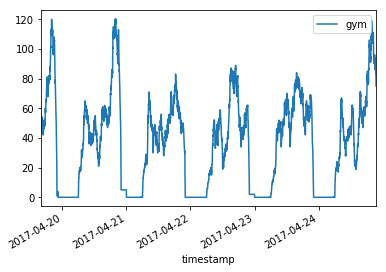

In [93]:
plt.show()

In [94]:
df[['gym', 'pool']].plot()

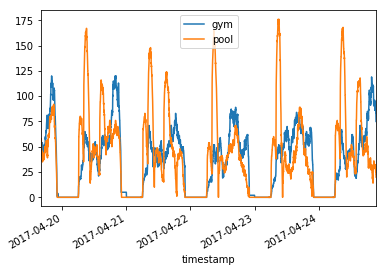

In [95]:
plt.show()

In [96]:
df['2017-04-20'][['gym', 'pool']].plot()

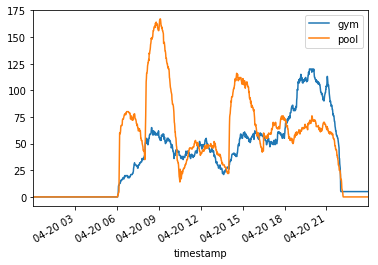

In [97]:
plt.show()

In [98]:
df['2017-04-22'].head()

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
timestamp,,,,,,
2017-04-22 00:00:02.389525+08:00,2017-04-22 00:00:02.389525+08:00,0.0,120.0,0.0,300.0,29
2017-04-22 00:01:02.841987+08:00,2017-04-22 00:01:02.841987+08:00,0.0,120.0,0.0,300.0,29
2017-04-22 00:02:02.207801+08:00,2017-04-22 00:02:02.207801+08:00,0.0,120.0,0.0,300.0,29
2017-04-22 00:03:02.535768+08:00,2017-04-22 00:03:02.535768+08:00,0.0,120.0,0.0,300.0,29
2017-04-22 00:04:02.845457+08:00,2017-04-22 00:04:02.845457+08:00,0.0,120.0,0.0,300.0,29


In [99]:
df[df.gym > 60]

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
timestamp,,,,,,
2017-04-19 17:50:02.673258+08:00,2017-04-19 17:50:02.673258+08:00,61.0,120.0,49.0,300.0,29
2017-04-19 17:52:02.350302+08:00,2017-04-19 17:52:02.350302+08:00,62.0,120.0,51.0,300.0,29
2017-04-19 17:53:02.684595+08:00,2017-04-19 17:53:02.684595+08:00,62.0,120.0,51.0,300.0,29
2017-04-19 17:54:02.027787+08:00,2017-04-19 17:54:02.027787+08:00,62.0,120.0,50.0,300.0,29
2017-04-19 17:55:02.292667+08:00,2017-04-19 17:55:02.292667+08:00,64.0,120.0,50.0,300.0,29
2017-04-19 17:56:02.569736+08:00,2017-04-19 17:56:02.569736+08:00,65.0,120.0,52.0,300.0,29
2017-04-19 17:57:02.775049+08:00,2017-04-19 17:57:02.775049+08:00,66.0,120.0,51.0,300.0,29
2017-04-19 17:58:02.059802+08:00,2017-04-19 17:58:02.059802+08:00,65.0,120.0,50.0,300.0,29
2017-04-19 17:59:02.437997+08:00,2017-04-19 17:59:02.437997+08:00,65.0,120.0,51.0,300.0,29


In [100]:
for d in range(22,19,-1):
    df['2017-04-%s'%d][['gym', 'pool']].plot()

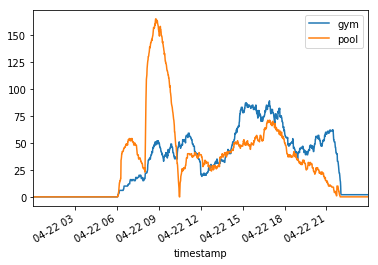

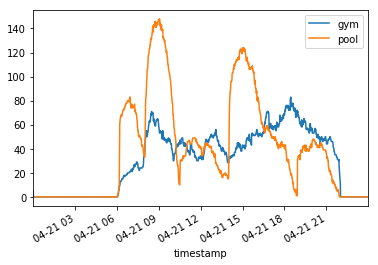

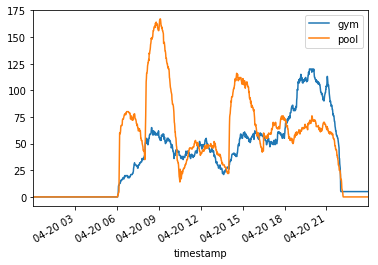

In [101]:
plt.show()

In [102]:
df.resample('d').mean()

,gym,gym_cap,pool,pool_cap,pool_temp
timestamp,,,,,
2017-04-19 00:00:00+08:00,55.845011,120.0,43.949045,300.0,29
2017-04-20 00:00:00+08:00,37.712300,120.0,46.706741,300.0,29
2017-04-21 00:00:00+08:00,30.841557,120.0,39.448923,300.0,29
2017-04-22 00:00:00+08:00,31.234028,120.0,33.046528,300.0,29
2017-04-23 00:00:00+08:00,34.373871,120.0,35.503822,300.0,29
2017-04-24 00:00:00+08:00,39.046548,120.0,45.246703,300.0,29


In [103]:
df = pd.read_csv('.././datasets/gym.csv', error_bad_lines=False)

In [104]:
df.head()

,timestamp,gym,gym_cap,pool,pool_cap,pool_temp
0,2017-04-19T16:09:28.036365+08:00,45.0,120.0,58.0,300.0,29
1,2017-04-19T16:10:02.452986+08:00,45.0,120.0,57.0,300.0,29
2,2017-04-19T16:11:02.675977+08:00,44.0,120.0,56.0,300.0,29
3,2017-04-19T16:12:01.910787+08:00,45.0,120.0,56.0,300.0,29
4,2017-04-19T16:13:02.149363+08:00,45.0,120.0,54.0,300.0,29


In [105]:
df[df['更新頻率'].str.contains('分鐘', na=False)]

KeyError: '更新頻率'

<h4>RegEx

In [2]:
# Regular Expression
import re

In [6]:
# 測試是否整個string都match pattern
re.match('\w*@', 'ianchen06@gmail.com')[0]

<_sre.SRE_Match object; span=(0, 10), match='ianchen06@'>

In [7]:
# 自傳內符合規則的部分
re.findall('[a-z0-9]+@[a-z0-9]+\.[a-z0-9]+', 'asdfasdfs,ian@gmail.com,,,232jasdfosdf')

['ian@gmail.com']